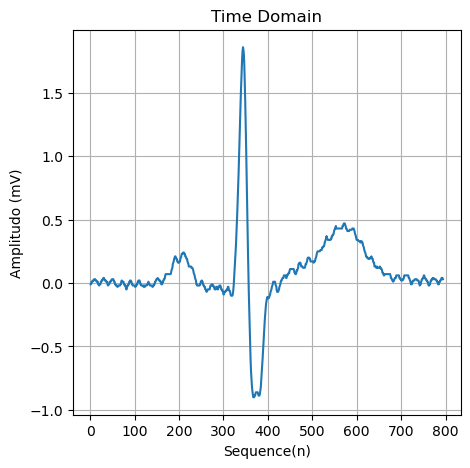

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

data = pd.read_excel('1-ECG-signal.xlsx')
N = len(data)

x=data.values[: , 0]
y=data.values[:, 1]
yn= y- 1.25

plt.figure(figsize=((5,5)))
plt.plot(x,yn)
plt.title("Time Domain")
plt.xlabel("Sequence(n)")
plt.ylabel("Amplitudo (mV)")
plt.grid()
plt.show()

DFT:


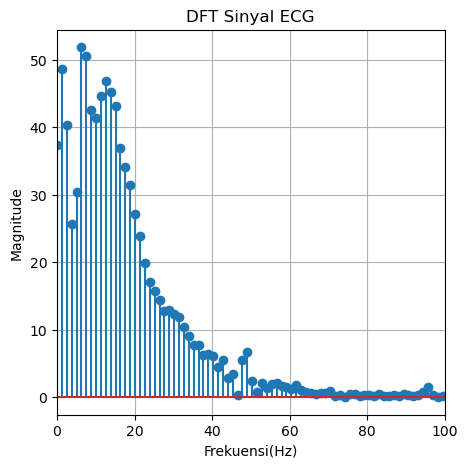

In [6]:
#DFT sinyal ECG

#initial Array
X_real= np.zeros(1000)
X_imj = np.zeros (1000)
MagDFT = np.zeros(1000)
fs=1000

#DFT
for k in range(N):
    for n in range(N):
      X_real[k] += (y[n])*np.cos(2*np.pi*k*n/N)
      X_imj[k] -= (y[n])*np.sin(2*np.pi*k*n/N)

for k in range(N):
   MagDFT[k] = np.sqrt(np.square(X_real[k])+ np.square(X_imj[k]))

#looping
n= np.arange(0,N,1,dtype=int)
k= np.arange(0,N,1,dtype=int)

#plotting DFT
print('DFT:')
plt.figure(figsize=((5,5)))
plt.stem(k*fs/N, MagDFT[k+1])
plt.title ("DFT Sinyal ECG")
plt.ylabel("Magnitude")
plt.xlabel("Frekuensi(Hz)")
plt.xlim(0,100)
plt.grid()
plt.show()

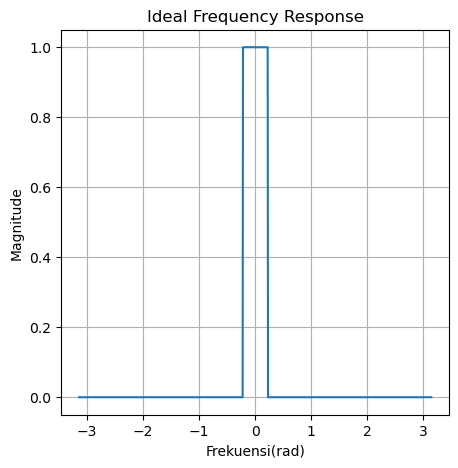

In [7]:
#Filter LPF

fc = 35
hn = []

p = []
h = np.zeros(fs + 1)

ohm_cutoff = 2 * np.pi * fc / fs

for i in range(fs):
    ohm = 2 * np.pi * (i - fs // 2) / fs
    if -ohm_cutoff <= ohm <= ohm_cutoff:
        h[i] = 1
    else:
        h[i] = 0
    p.append(h[i])

ohm = np.linspace(-np.pi, np.pi, fs)

plt.figure(figsize=(5, 5))
plt.plot(ohm, p)
plt.title("Ideal Frequency Response")
plt.ylabel("Magnitude")
plt.xlabel("Frekuensi(rad)")
plt.grid()
plt.show()

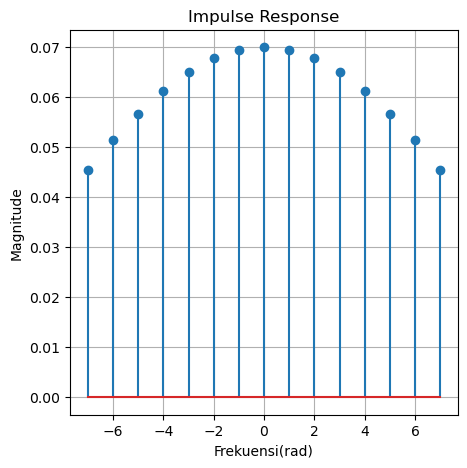

In [8]:
#Impulse Response LPF

M = 15
ohm_cutoff = 2 * np.pi * fc / fs

for j in range(-M // 2 + 1, M // 2 + 1, 1):
      if j == 0:
          h[j] = ohm_cutoff / np.pi
      else:
          h[j] = np.sin(ohm_cutoff * j) / (np.pi * j)

j = np.arange(-M // 2 + 1, M // 2 + 1, 1)

plt.figure(figsize=(5, 5))
plt.stem(j, h[j])
plt.title("Impulse Response")
plt.ylabel("Magnitude")
plt.xlabel("Frekuensi(rad)")
plt.grid()
plt.show()

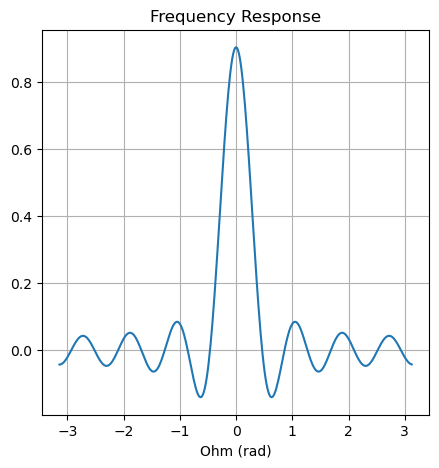

In [9]:
#Frekuensi Response

xf = {}
ohm_values = []
h_values = []

hn = np.zeros(2 * M)
for i in range(0, 2 * M):
    hn[i] = h[i - M]

for i in range(-180, 180):
    ohm = 2 * i * np.pi / 360
    temp = 0
    for j in range(1, M + 1):
        temp += h[j] * np.cos(j * ohm)
    xf[i] = h[0] + 2 * temp
    ohm_values.append(ohm)
    h_values.append(xf[i])

plt.figure(figsize=(5,5))
plt.plot(ohm_values, h_values)
plt.xlabel('Ohm (rad)')
plt.title('Frequency Response')
plt.grid()
plt.show()

In [10]:
def forward(N, M, x, hn, fs):
    y_forward = np.zeros(N)
    sumbux =[]
    counter = 0
    for i in range(0, N):
        temp = 0
        if i > M:
            temp = 0
            for j in range(2*M):
                temp += x[i - j] * hn[j]
            y_forward[counter] = temp
            counter += 1
    return y_forward

def backward (N, M, y_forward, hn, fs):
    y_backward = np.zeros(N)
    sumbux = np.zeros(N)
    for i in range(N-1, -1, -1):
        for j in range(2*M):
            y_backward[i] += y_forward[i + j] * hn[j]
        sumbux[i] = i/fs


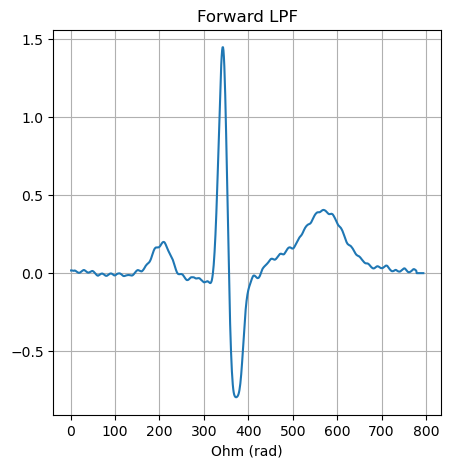

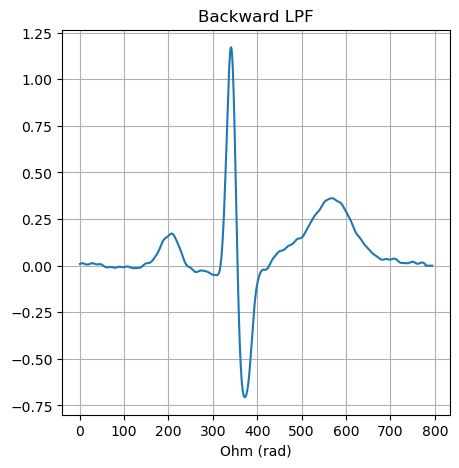

In [11]:
#Forward LPF

yforward_lpf = []
yforward_lpf= forward(N, M, yn, hn, fs)

plt.figure(figsize=(5,5))
plt.plot(x, yforward_lpf)
plt.xlabel('Ohm (rad)')
plt.title('Forward LPF')
plt.grid()
plt.show()

#Backward LPf

ybackward_lpf = []
ybackward_lpf= forward(N, M, yforward_lpf, hn, fs)
plt.figure(figsize=(5,5))
plt.plot(x, ybackward_lpf)
plt.xlabel('Ohm (rad)')
plt.title('Backward LPF')
plt.grid()
plt.show()

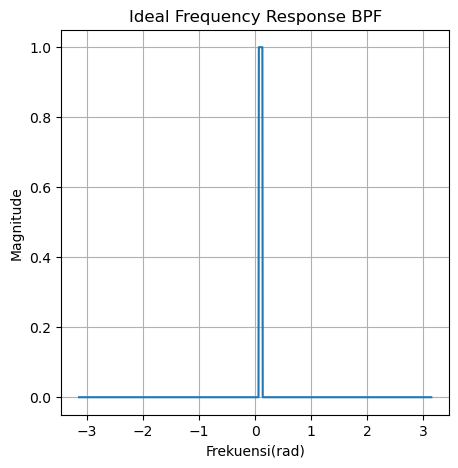

In [12]:
#Filter BPF

fH = 20
fL = 10
hn = []

p = []
h = np.zeros(fs + 1)

ohm_H = 2 * np.pi * fH / fs
ohm_L = 2 * np.pi * fL / fs

for i in range(fs):
    ohm = 2 * np.pi * (i - fs // 2) / fs
    if ohm_L <= ohm <= ohm_H or -ohm_L <= ohm <= -ohm_H:
        h[i] = 1
    else:
        h[i] = 0
    p.append(h[i])

ohm = np.linspace(-np.pi, np.pi, fs)

plt.figure(figsize=(5, 5))
plt.plot(ohm, p)
plt.title("Ideal Frequency Response BPF")
plt.ylabel("Magnitude")
plt.xlabel("Frekuensi(rad)")
plt.grid()
plt.show()

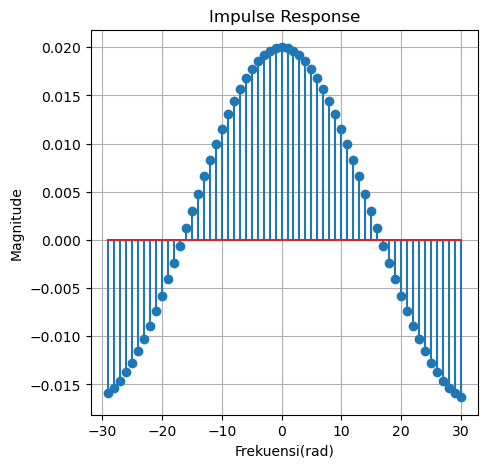

In [13]:
#Impluse Response BPF

h = np.zeros(fs + 1)
M=60
for j in range(-M // 2 + 1, M // 2 + 1, 1):
    if j==0:
        h[j]=(ohm_H-ohm_L)/np.pi
    else:
        h[j]=(np.sin(ohm_H*j)/(np.pi*j))-(np.sin(ohm_L*j)/(np.pi*j))

j = np.arange(-M // 2 + 1, M // 2 + 1, 1)

plt.figure(figsize=(5, 5))
plt.stem(j, h[j])
plt.title("Impulse Response")
plt.ylabel("Magnitude")
plt.xlabel("Frekuensi(rad)")
plt.grid()
plt.show()

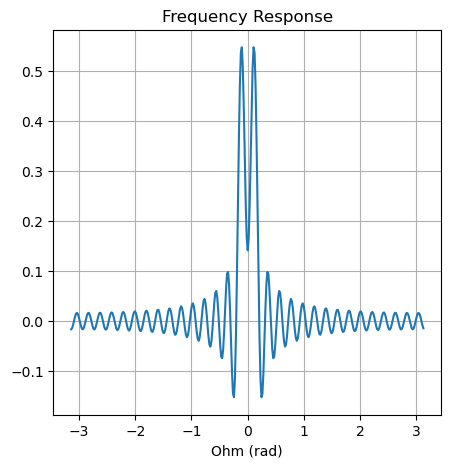

In [14]:
#Frekuensi Response BPF

xf = {}
ohm_values = []
h_values = []

hn = np.zeros(2 * M)
for i in range(0, 2 * M):
    hn[i] = h[i - M]

for i in range(-180, 180):
    ohm = 2 * i * np.pi / 360
    temp = 0
    for j in range(1, M + 1):
        temp += h[j] * np.cos(j * ohm)
    xf[i] = h[0] + 2 * temp

    ohm_values.append(ohm)
    h_values.append(xf[i])

plt.figure(figsize=(5,5))
plt.plot(ohm_values, h_values)
plt.xlabel('Ohm (rad)')
plt.title('Frequency Response')
plt.grid()
plt.show()


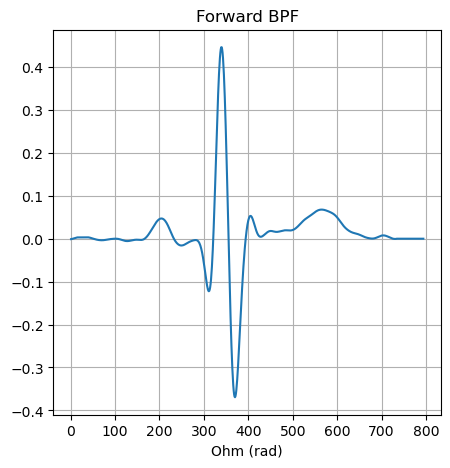

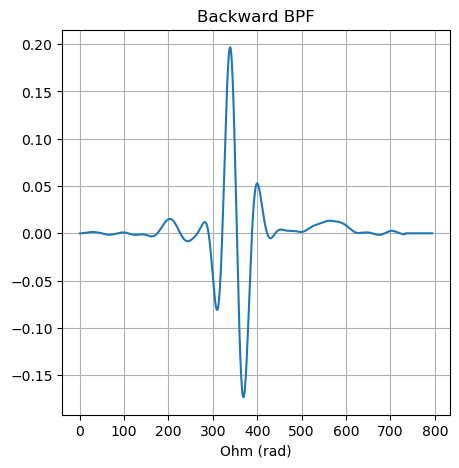

In [36]:
#Forward BPF

yforward_bpf = []
yforward_bpf= forward(N, M, ybackward_lpf, hn, fs)

plt.figure(figsize=(5,5))
plt.plot(x, yforward_bpf)
plt.xlabel('Ohm (rad)')
plt.title('Forward BPF')
plt.grid()
plt.show()

#Backward LPf

ybackward_bpf = []
ybackward_bpf= forward(N, M, yforward_bpf, hn, fs)
plt.figure(figsize=(5,5))
plt.plot(x, ybackward_bpf)
plt.xlabel('Ohm (rad)')
plt.title('Backward BPF')
plt.grid()
plt.show()

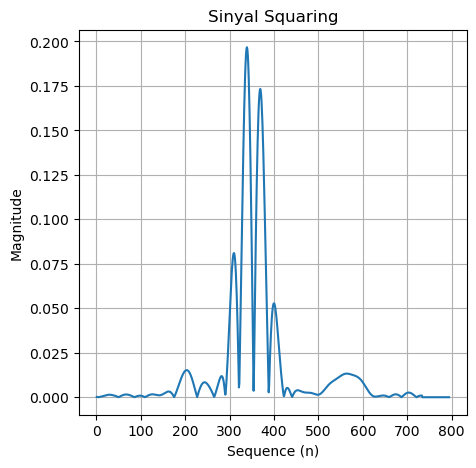

In [17]:
positif_signal = []
for i in range (N):
    positif_signal.append(np.sqrt(np.square(ybackward_bpf[i])))

plt.figure(figsize=(5,5))
plt.plot(x,positif_signal)
plt.xlabel("Sequence (n)")
plt.ylabel("Magnitude")
plt.title("Sinyal Squaring")
plt.grid()

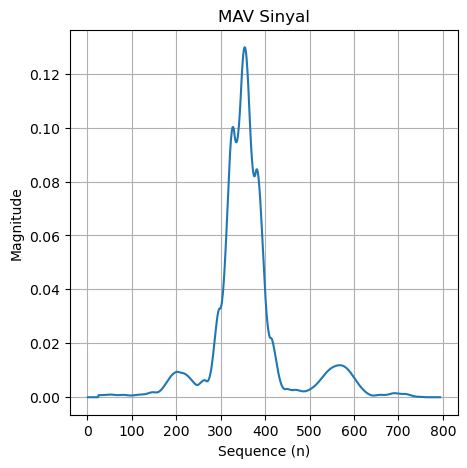

In [18]:
def MAV(signal, window):

   sum = 0
   mAver = []
   k = int((window-1)/2)

   for i in np.arange(k, len(signal)-k):
       for ii in np.arange(i-k, i+k):
           sum = sum + signal[ii]
       mAver.append(sum / window)
       sum = 0

   zeros = [0]*k
   mAver = zeros + mAver + zeros
   return mAver

signal_MAV = []
signal_MAV = MAV(positif_signal, 50)

plt.figure(figsize=((5,5)))
plt.plot(x, signal_MAV)
plt.xlabel("Sequence (n)")
plt.ylabel("Magnitude")
plt.title("MAV Sinyal")
plt.grid()


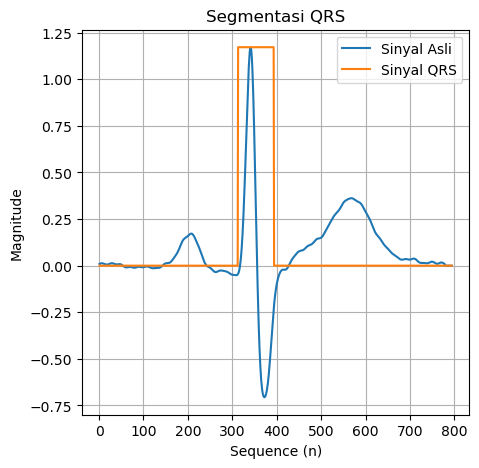

In [19]:
segmentasi_qrs = []
for i in range (N):
    if signal_MAV[i]>0.45 * np.max(signal_MAV):
        segmentasi_qrs.append(np.max(ybackward_lpf))
    else:
        segmentasi_qrs.append(0)

plt.figure(figsize=((5,5)))
plt.plot(x,ybackward_lpf, x,segmentasi_qrs)
plt.xlabel("Sequence (n)")
plt.ylabel("Magnitude")
plt.title("Segmentasi QRS")
plt.legend(["Sinyal Asli","Sinyal QRS"])
plt.grid()